# (Students performance Exploration )
## by ( Amira Ahmed Reda Mostafa Mehriz)


## Investigation Overview

> investigate what affect students scores 

## Dataset Overview

> https://www.kaggle.com/spscientist/students-performance-in-exams
>This data set consists of the marks secured by the students in various subjects.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The dataset is clean and has no nulls 

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


reading scores has the heighest mean of scores 

In [5]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [6]:
df["parental level of education"].unique()


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [8]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

### What is the structure of your dataset?

> There are 1000 student in the dataset with 8 variables (gender , race/ethnicity , parental level of education , lunch , test preparation course , math score , reading score , and writing score )
>scores are numeric values and the rest are categorical values 

### What is/are the main feature(s) of interest in your dataset?

> How the factors of :  gender , parental level of education  , race/ethnicity , test preparation course , or lunch may affect the scores of students 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> may be gender , parental level of education  , race/ethnicity , test preparation course , or lunch 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Qualtitive (Categorical ) --> Bar chart

> Quantitive (numeric)      --> Histograms

In [9]:
#the base blue color of the plot
base_color = sb.color_palette()[0]

In [10]:
#number of students in the dataset
n = df.shape[0]
n

1000

In [11]:
gender_counts = df['gender'].value_counts()
gender_order = gender_counts.index #to plot the genders in descending order
max_gender_count = gender_counts[0]
max_prop_gender = max_gender_count / n
max_prop_gender

0.518

## propotion of female students vs male students

> 51.8% of the students are females and 48.2% are males

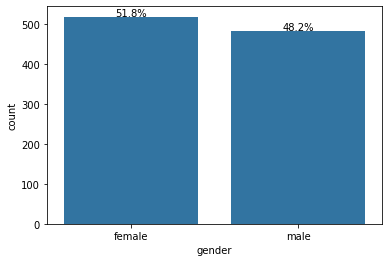

In [12]:
#plotting the percentage of females and males students in the dataset
sb.countplot(data=df, x='gender', color=base_color, order=gender_order);


# Recalculating the gender_counts just to have clarity.
gender_counts = df['gender'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

so we tell that 51.8% of the students are females and 48.2% are males 


In [13]:
group_counts = df['race/ethnicity'].value_counts()
group_order = group_counts.index
max_group_count = group_counts[0]
max_prop_group = max_group_count / df.shape[0]
max_prop_group

0.319

## Distribution of students between race groups
> 31.9% of students are from group C race/ethnicity and 26.2 % from group D and 19% from group B , 14% group E and 8.9% group A

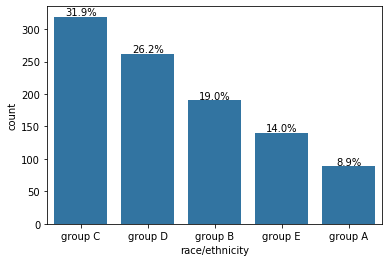

In [14]:
#plotting the percentage race/ethnicity of students of each group in the dataset
sb.countplot(data=df, x='race/ethnicity', color=base_color, order=group_order); # they are not ordered groups so I sorted them descendently


# Recalculating the group_counts just to have clarity.
group_counts = df['race/ethnicity'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = group_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

so we tell that 31.9% of students are from group C race/ethnicity 
and 26.2 % from group D and 19% from group B , 14% group E and 8.9% group A

In [15]:
#PLE -> parental level of education
PLE_counts = df['parental level of education'].value_counts()
PLE_order = PLE_counts.index
max_PLE_count = PLE_counts[0]
max_prop_PLE = max_PLE_count / df.shape[0]
max_prop_PLE

0.226

## Distribution of parental levels of education
>some college 22.6 % , associate's degree 22.2% ,high school 19.6% ,some high school 17.9% ,bachelor's degree 11.8% ,master's degree 5.9%

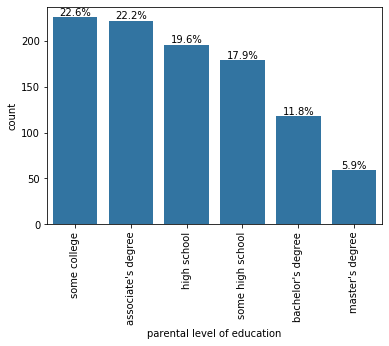

In [16]:
#plotting the percentage of parental level of education of each student in the dataset
sb.countplot(data=df, x='parental level of education', color=base_color, order=PLE_order);


# Recalculating the PLE_counts just to have clarity.
PLE_counts = df['parental level of education'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = PLE_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

<p>parental level of education</p>
<ol>
  <li>some college 22.6 %</li>
  <li>associate's degree 22.2%</li>
  <li>high school 19.6%</li>
  <li>some high school 17.9%</li>
  <li>bachelor's degree 11.8%</li>
  <li>master's degree 5.9%</li>
</ol>


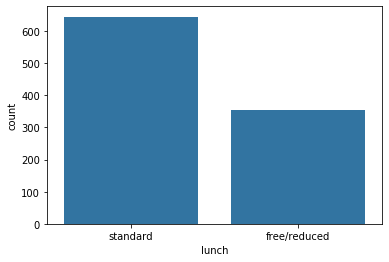

In [17]:
sb.countplot(data=df , x='lunch', color=base_color);

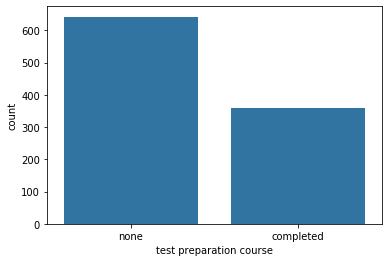

In [18]:
sb.countplot(data=df , x='test preparation course', color=base_color);

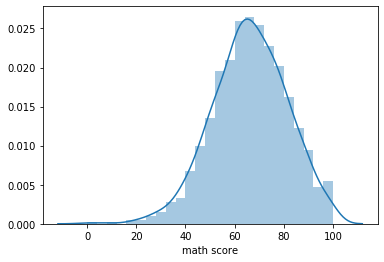

In [19]:
sb.distplot(df['math score'])

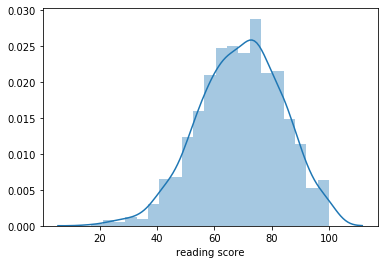

In [20]:
sb.distplot(df['reading score'])

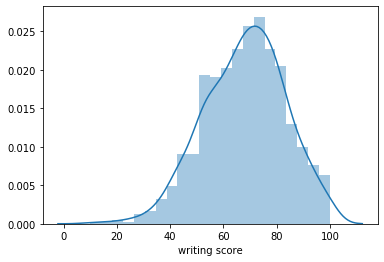

In [21]:
sb.distplot(df['writing score'])

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is no unusual points ,also no transformations needed in the univariate exploration of data.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The dataset was in a tidy format and no further operations needed.

## Bivariate Exploration


## The relationship between 'math score' and 'reading score' and 'writing score'
>The 'math score' and 'reading score' and 'writing score' are all highly correlated with one another

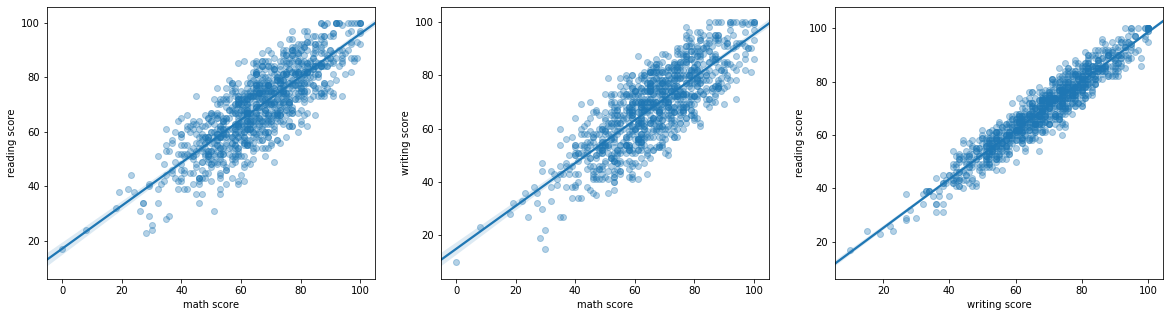

In [22]:
# plot a scatter plot between two numeric variables 
plt.figure(figsize = [20, 5]) 
#math score and reading score :
plt.subplot(1 ,3 , 1) # 1 row , 3 columns , subplot 1
sb.regplot(data = df , x = 'math score' , y = 'reading score' ,scatter_kws = {'alpha' : 1/3});

#math score and writing score :
plt.subplot(1 ,3 , 2) # 1 row , 3 columns , subplot 2
sb.regplot(data = df , x = 'math score' , y = 'writing score' ,scatter_kws = {'alpha' : 1/3});

#writing score and reading score :
plt.subplot(1 ,3 , 3) # 1 row , 3 columns , subplot 3
sb.regplot(data = df , x = 'writing score' , y = 'reading score' ,scatter_kws = {'alpha' : 1/3});

The 'math score' and 'reading score' and 'writing score' are all highly correlated with one another

In [23]:
# add a new column containing the Total grade of a student
df['Total score'] = df['math score']+df['reading score']+df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


## How parental level of education affect the total score of a student

>students who have a parental level of education of master's degree score higher scores.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

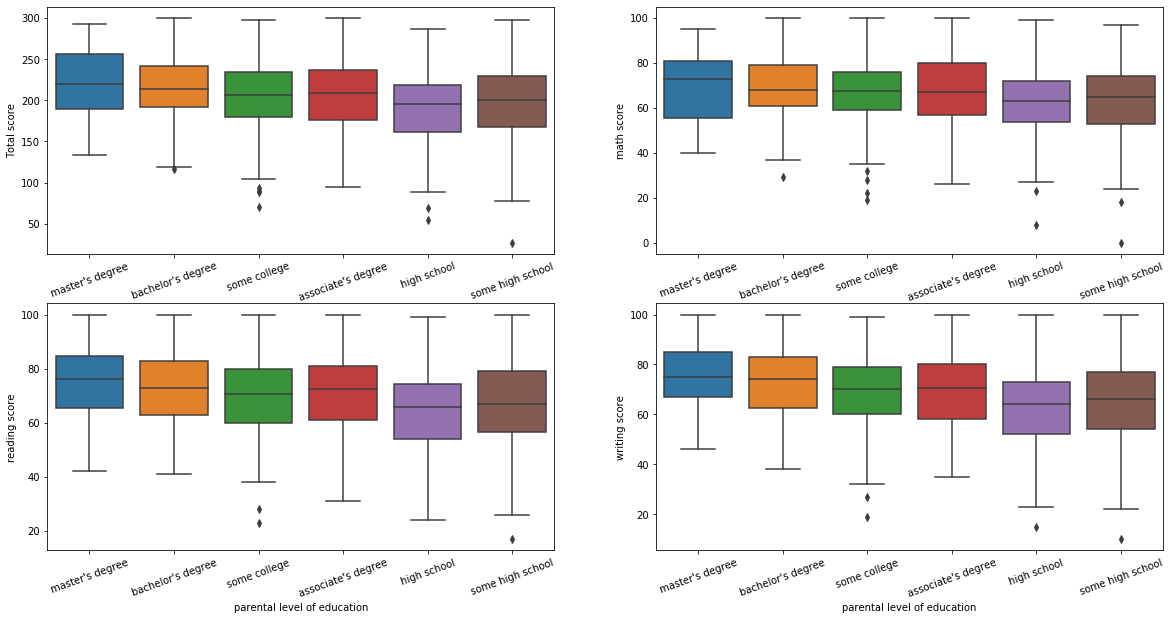

In [24]:
plt.figure(figsize = [20 ,10])

plt.subplot(2 , 2 , 1) # 2 rows , 2 columns , fig 1
# box plot between quantitive (total score ) and categorical  (parental level of education)
levels = ["master's degree", "bachelor's degree", 'some college',"associate's degree", 'high school', 'some high school']
level = pd.api.types.CategoricalDtype(ordered = True , categories = levels)
df['parental level of education']=df['parental level of education'].astype(level);
sb.boxplot(data = df , x= 'parental level of education' , y = 'Total score');
plt.xticks(rotation = 20)

plt.subplot(2 , 2 , 2) # 2 rows , 2 columns , fig 2
# box plot between quantitive (math score ) and categorical  (parental level of education)
levels = ["master's degree", "bachelor's degree", 'some college',"associate's degree", 'high school', 'some high school']
level = pd.api.types.CategoricalDtype(ordered = True , categories = levels)
df['parental level of education']=df['parental level of education'].astype(level);
sb.boxplot(data = df , x= 'parental level of education' , y = 'math score');
plt.xticks(rotation = 20)

plt.subplot(2 , 2 , 3) # 2 rows , 2 columns , fig 3
# box plot between quantitive (reading score ) and categorical  (parental level of education)
levels = ["master's degree", "bachelor's degree", 'some college',"associate's degree", 'high school', 'some high school']
level = pd.api.types.CategoricalDtype(ordered = True , categories = levels)
df['parental level of education']=df['parental level of education'].astype(level);
sb.boxplot(data = df , x= 'parental level of education' , y = 'reading score');
plt.xticks(rotation = 20)

plt.subplot(2 , 2 , 4) # 2 rows , 2 columns , fig 4
# box plot between quantitive (writing score ) and categorical  (parental level of education)
levels = ["master's degree", "bachelor's degree", 'some college',"associate's degree", 'high school', 'some high school']
level = pd.api.types.CategoricalDtype(ordered = True , categories = levels)
df['parental level of education']=df['parental level of education'].astype(level);
sb.boxplot(data = df , x= 'parental level of education' , y = 'writing score');
plt.xticks(rotation = 20)

students who have a parental level of education of master's degree score higher scores.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

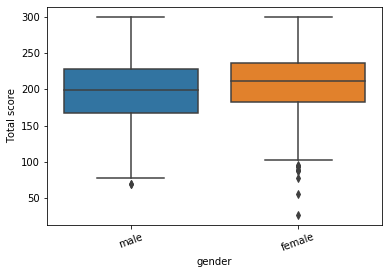

In [25]:
# box plot between quantitive (total score ) and categorical  (gender)

levels = ['male' , 'female']
level = pd.api.types.CategoricalDtype(ordered = True , categories = levels)
df['gender']=df['gender'].astype(level);
sb.boxplot(data = df , x= 'gender' , y = 'Total score')
plt.xticks(rotation = 20)

Femals have a total grade higher than males 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

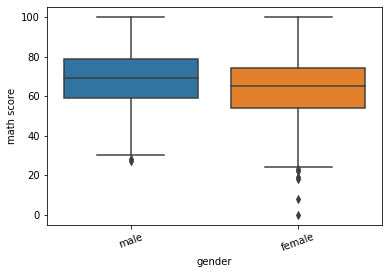

In [26]:
# box plot between quantitive (math score ) and categorical  (gender)

levels = ['male' , 'female']
level = pd.api.types.CategoricalDtype(ordered = True , categories = levels)
df['gender']=df['gender'].astype(level);
sb.boxplot(data = df , x= 'gender' , y = 'math score')
plt.xticks(rotation = 20)

males are better in math than females

(array([0, 1]), <a list of 2 Text xticklabel objects>)

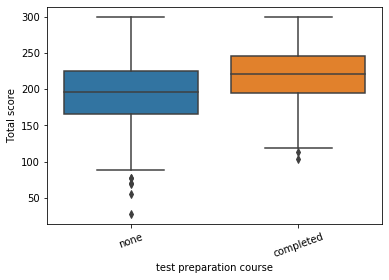

In [27]:
# box plot between quantitive (total score ) and categorical  (test preparation course)

levels = ['none' , 'completed']
level = pd.api.types.CategoricalDtype(ordered = True , categories = levels)
df['test preparation course']=df['test preparation course'].astype(level);
sb.boxplot(data = df , x= 'test preparation course' , y = 'Total score')
plt.xticks(rotation = 20)

students who completed thier test preparation course get a higher grade in total

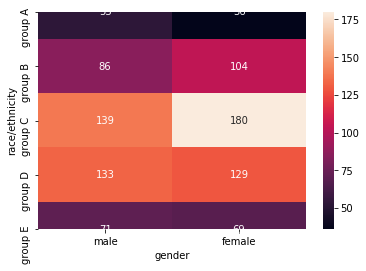

In [28]:
#Heat map x : race/ethnicity y : gender
counts = df.groupby(['race/ethnicity','gender']).size()
counts = counts.reset_index(name = 'count')
counts= counts.pivot(index='race/ethnicity',columns ='gender' , values = 'count')
sb.heatmap(counts , annot = True , fmt = 'd')

group A is the group with the hieghest number of students ,and they are females.

group C is the group with the lowest number of students ,and they are also females.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> parental level of education affects scores of the student (higher level of education -> higher scores )

> females have on average a total score higher than males but when it comes to math males are better.

>students who completed their test preparation course scored higher grades on average that those who didn't.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> math score and reading score and writing score are all strongly correlated to each other

## Multivariate Exploration


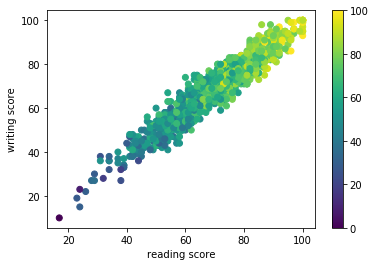

In [29]:
#math score and writing score and reading score (encoding via color):
plt.scatter(data =df , x='reading score' , y='writing score' , c ='math score' )
plt.colorbar()
plt.xlabel('reading score');
plt.ylabel('writing score');


students who score high scores on reading and writing are more likely to score high scores on math

## How the test preparation course affect math scores and writing scores

>students who completed thier test preparation course are more likely to get higher math grades and writing scores

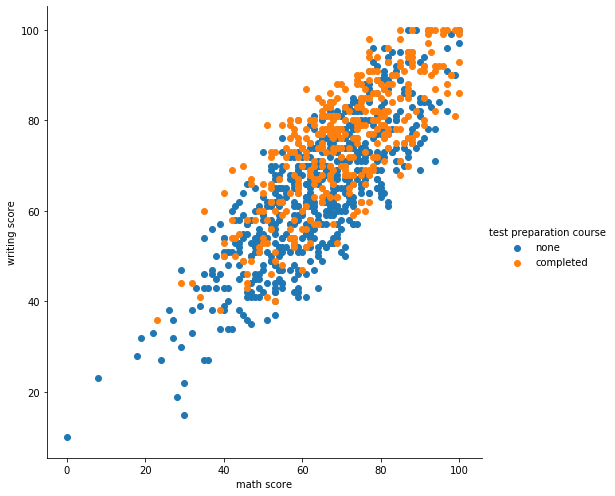

In [30]:
# math score and writing score  VS test preparation course (encoding via color)
g = sb.FacetGrid(data = df , hue = 'test preparation course' ,size =7 )
g=g.map(plt.scatter ,'math score' , 'writing score' )
g.add_legend()

students who completed thier test preparation course are more likely to get higher math grades and writing scores

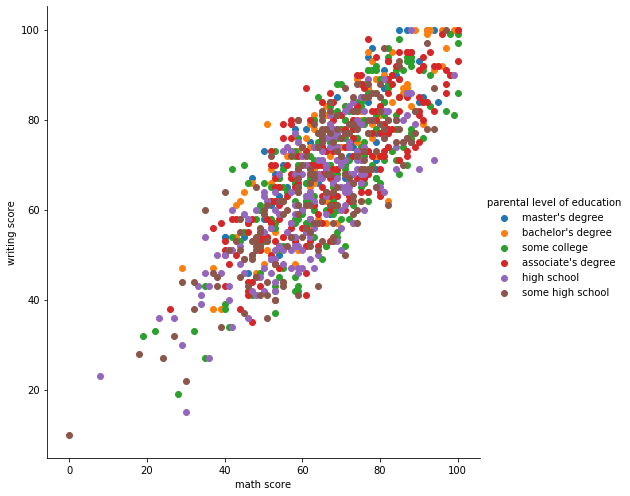

In [31]:
# math score and writing score  VS parental level of education (encoding via color)
g = sb.FacetGrid(data = df , hue = 'parental level of education' ,size =7 )
g=g.map(plt.scatter ,'math score' , 'writing score' )
g.add_legend()


# How the lunch of the students affect math scores and writing scores

>students whose lunch is standard score higher grades in math and writing than students with free/reduced lunch

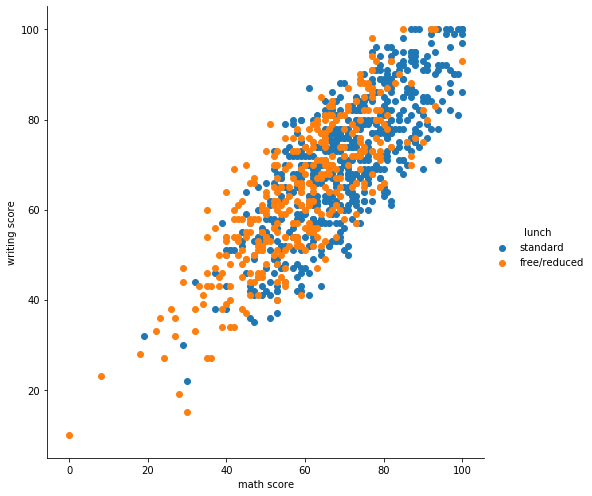

In [32]:
# math score and writing score  VS lunch (encoding via color)
g = sb.FacetGrid(data = df , hue = 'lunch' ,size =7 )
g=g.map(plt.scatter ,'math score' , 'writing score' )
g.add_legend()

students whose lunch is standard score higher grades in math and writing than students with free/reduced lunch

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> students who score high scores on reading and writing are more likely to score high scores on math

> students who completed thier test preparation course are more likely to get higher math grades and writing scores\

>students whose lunch is standard score higher grades in math and writing than students with free/reduced lunch

### Were there any interesting or surprising interactions between features?

> were not surprising as we concluded them from the bivariate exploration

In [ ]:
  !jupyter nbconvert slide_deck.ipynb --to slides --post serve  --no-input --no-prompt